In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats 
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import os
os.getcwd()

'c:\\Users\\bas\\Desktop\\test\\ML2022\\src\\data_exploration'

In [4]:
"""Load dataset in a DataFrame"""
df = pd.read_csv("../../data/API/jan_2021_to_mar_2022_with_attributes.csv")
df = df.drop(['game_mode'], axis=1)
df

,match_id,match_result,1_antimage,2_axe,3_bane,4_bloodseeker,5_crystal_maiden,6_drow_ranger,7_earthshaker,8_juggernaut,...,radiant_str,radiant_int,radiant_agi,radiant_melee,radiant_ranged,dire_str,dire_int,dire_agi,dire_melee,dire_ranged
0,5858502982,1,0,0,0,0,0,0,0,0,...,0.4,0.2,0.4,0.8,0.2,0.4,0.4,0.2,0.8,0.2
1,5853470032,1,0,0,0,0,0,0,0,0,...,0.6,0.4,0.0,0.6,0.4,0.2,0.6,0.2,0.4,0.6
2,5824248643,1,0,0,0,0,0,0,1,1,...,0.4,0.4,0.2,0.6,0.4,0.4,0.4,0.2,0.2,0.8
3,5814995665,1,0,0,0,0,0,0,0,0,...,0.2,0.6,0.2,0.4,0.6,0.0,0.6,0.4,0.2,0.8
4,5858284957,1,0,0,0,0,0,0,1,0,...,0.4,0.4,0.2,0.4,0.6,0.4,0.2,0.4,0.6,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12835,6467920786,-1,0,0,0,0,0,0,0,0,...,0.6,0.2,0.2,0.4,0.6,0.6,0.2,0.2,0.8,0.2
12836,6469643204,-1,0,0,0,0,0,0,0,1,...,0.2,0.4,0.4,0.4,0.6,0.2,0.4,0.4,0.4,0.6
12837,6474161699,-1,0,0,0,0,0,0,0,0,...,0.6,0.2,0.2,0.6,0.4,0.6,0.2,0.2,0.4,0.6
12838,6477531767,-1,1,0,0,0,0,0,0,0,...,0.0,0.6,0.4,0.4,0.6,0.4,0.2,0.4,0.6,0.4


In [5]:
to_multiply = "radiant_str,radiant_int,radiant_agi,radiant_melee,radiant_ranged,dire_str,dire_int,dire_agi,dire_melee,dire_ranged".split(",")
for item in to_multiply:
    df[item] = df[item] * 5
    df[item] = df[item].astype('int')

df.head()

,match_id,match_result,1_antimage,2_axe,3_bane,4_bloodseeker,5_crystal_maiden,6_drow_ranger,7_earthshaker,8_juggernaut,...,radiant_str,radiant_int,radiant_agi,radiant_melee,radiant_ranged,dire_str,dire_int,dire_agi,dire_melee,dire_ranged
0,5858502982,1,0,0,0,0,0,0,0,0,...,2,1,2,4,1,2,2,1,4,1
1,5853470032,1,0,0,0,0,0,0,0,0,...,3,2,0,3,2,1,3,1,2,3
2,5824248643,1,0,0,0,0,0,0,1,1,...,2,2,1,3,2,2,2,1,1,4
3,5814995665,1,0,0,0,0,0,0,0,0,...,1,3,1,2,3,0,3,2,1,4
4,5858284957,1,0,0,0,0,0,0,1,0,...,2,2,1,2,3,2,1,2,3,2


In [6]:
print(df.isnull().sum())

match_id        0
match_result    0
1_antimage      0
2_axe           0
3_bane          0
               ..
dire_str        0
dire_int        0
dire_agi        0
dire_melee      0
dire_ranged     0
Length: 135, dtype: int64


Is there a difference in class composition between teams?

In [7]:
df['match_result'].value_counts()

 1    6420
-1    6420
Name: match_result, dtype: int64

In [8]:
class_info = "match_result radiant_melee radiant_ranged dire_melee dire_ranged".split(" ")

radiant_win = df[class_info]
radiant_win = radiant_win[radiant_win["match_result"] == 1]
radiant_win

dire_win = df[class_info]
dire_win = dire_win[dire_win["match_result"] == -1]
dire_win



,match_result,radiant_melee,radiant_ranged,dire_melee,dire_ranged
6420,-1,2,3,3,2
6421,-1,2,3,4,1
6422,-1,2,3,3,2
6423,-1,4,1,1,4
6424,-1,1,4,4,1
...,...,...,...,...,...
12835,-1,2,3,4,1
12836,-1,2,3,2,3
12837,-1,3,2,2,3
12838,-1,2,3,3,2


In [9]:
# 12386 
for i in range(6):
    win_lose_d = df[df['dire_melee'] == i]['match_result'].value_counts()
    win_ratio = round(win_lose_d[-1]/win_lose_d.sum()*100, 1)

    win_lose_r = df[df['radiant_melee'] == i]['match_result'].value_counts()
    win_ratio = round(win_lose_r[1]/win_lose_r.sum()*100, 1)

    total_win = (win_lose_r[1] + win_lose_d[-1])
    total_lose = (win_lose_r[-1] + win_lose_d[1])
    
    pop = round((total_win + total_lose) / 12840*50, 1)
    ratio = round(total_win / (total_win + total_lose) * 100, 1)

    print("Melee: %s, Ranged: %s Win: %s Lose: %s Winratio: %s%% Pop: %s%%" % (i, 5-i, total_win, total_lose, ratio, pop))

Melee: 0, Ranged: 5 Win: 38 Lose: 39 Winratio: 49.4% Pop: 0.3%
Melee: 1, Ranged: 4 Win: 1345 Lose: 1440 Winratio: 48.3% Pop: 10.8%
Melee: 2, Ranged: 3 Win: 5636 Lose: 5595 Winratio: 50.2% Pop: 43.7%
Melee: 3, Ranged: 2 Win: 4759 Lose: 4679 Winratio: 50.4% Pop: 36.8%
Melee: 4, Ranged: 1 Win: 1022 Lose: 1062 Winratio: 49.0% Pop: 8.1%
Melee: 5, Ranged: 0 Win: 40 Lose: 25 Winratio: 61.5% Pop: 0.3%


In [10]:
df['dire_melee'].value_counts()

2    5580
3    4757
1    1383
4    1058
0      33
5      29
Name: dire_melee, dtype: int64

In [11]:
str_freq = (df[["dire_str"]].value_counts() + df[["radiant_str"]].value_counts()).sort_index()
str_freq = str_freq / str_freq.sum() * 100
int_freq = (df[["radiant_int"]].value_counts() + df[["dire_int"]].value_counts()).sort_index()
int_freq = int_freq / int_freq.sum() * 100
agi_freq = (df[["radiant_agi"]].value_counts() + df[["dire_agi"]].value_counts()).sort_index()
agi_freq = agi_freq / agi_freq.sum() * 100

#str_freq = pd.DataFrame(str_freq)
#sns.barplot(str_freq.index, str_freq.values)

In [24]:
str_freq.sum()

100.00000000000001

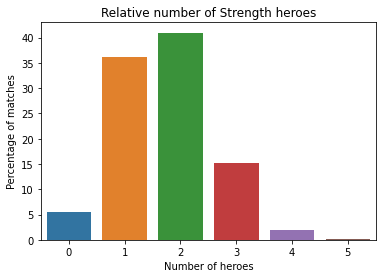

In [25]:
ax = sns.barplot(y=list(str_freq[0:6].values), x=list(range(6))).set(title="Relative number of Strength heroes", xlabel="Number of heroes", ylabel="Percentage of matches")
plt.savefig('str_heroes.png')

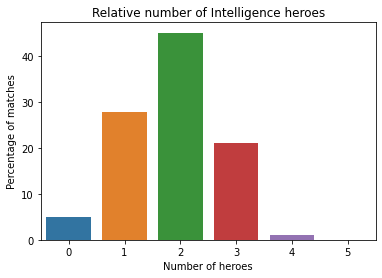

In [26]:
ax = sns.barplot(y=list(int_freq[0:6].values), x=list(range(6))).set(title="Relative number of Intelligence heroes", xlabel="Number of heroes", ylabel="Percentage of matches")
plt.savefig('int_heroes.png')

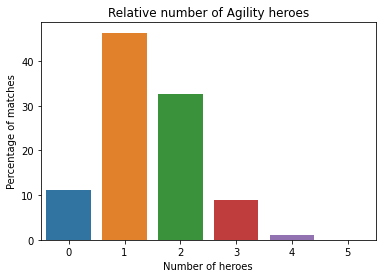

In [27]:
ax = sns.barplot(y=list(agi_freq[0:6].values), x=list(range(6))).set(title="Relative number of Agility heroes", xlabel="Number of heroes", ylabel="Percentage of matches")
plt.savefig('agi_heroes.png')

# Decompose the original matrix into a full sparse matrix describing both teams
Unused code. Maybe useful for follow up project?

In [310]:
class_info = ['radiant_melee',
             'radiant_ranged',
             'dire_melee',
             'dire_ranged',
             'dire_str',
             'dire_int',
             'dire_agi',
             'radiant_str',
             'radiant_int',
             'radiant_agi']

heroes = df.drop(class_info, axis=1).drop(["match_id", "match_result"], axis=1)
heroes = heroes.columns.to_list()
newlist_1 = [x + "_radiant" for x in heroes]
newlist_2 = [x + "_dire" for x in heroes]

full_heroes_list = [*newlist_1, *newlist_2]
df.head()

,match_id,match_result,1_antimage,2_axe,3_bane,4_bloodseeker,5_crystal_maiden,6_drow_ranger,7_earthshaker,8_juggernaut,...,radiant_str,radiant_int,radiant_agi,radiant_melee,radiant_ranged,dire_str,dire_int,dire_agi,dire_melee,dire_ranged
0,5792362494,1,0,0,0,0,0,0,0,0,...,1,2,2,1,4,1,3,1,1,4
1,5794821137,-1,0,0,0,-1,1,0,0,0,...,2,2,1,2,3,2,2,1,3,2
2,5790226407,1,0,0,0,0,0,0,0,0,...,1,1,3,2,3,3,1,1,3,2
3,5790375758,1,0,0,0,0,0,0,0,0,...,2,3,0,2,3,2,2,1,3,2
4,5790649968,-1,0,0,0,0,0,0,0,0,...,2,3,0,2,3,4,0,1,4,1


In [319]:
def decompose_sparse_matrix(match, full_heroes_list):
    used_heroes_dire = match[match == -1].index.to_list() 
    used_heroes_radiant = match[match ==  1].index.to_list() 

    s = pd.Series(0, index=full_heroes_list)
    s[[x + "_dire" for x in used_heroes_dire]] = 1
    s[[x + "_radiant" for x in used_heroes_radiant]] = 1
    return s


In [327]:
only_hero_information = df.drop(["match_id", "match_result", *class_info], axis=1)
sparse_matrix = only_hero_information.apply(lambda x: decompose_sparse_matrix(x, full_heroes_list), axis=1)

to_select = ["match_id", "match_result", *class_info]
full_sparse_matrix = pd.concat([df[["match_id", "match_result", *class_info]], sparse_matrix], axis=1).reindex(df.index)

full_sparse_matrix['match_result'] = full_sparse_matrix['match_result'].replace([-1], 0)
full_sparse_matrix

In [10]:
x = df.drop(["match_id", "match_result"], axis=1)
y = df['match_result']